<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Denoising_fMRI_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import scipy.io

In [39]:
mat = scipy.io.loadmat('DatosT.mat')
#mat = scipy.io.loadmat('DatosN.mat')
etique = scipy.io.loadmat('EtiquetasT.mat')
Datos=mat['Datos_C']
#Datos=mat['DatosNor']
Etiq=np.transpose(etique['etiquetas'])[:,0]
print (np.shape(Datos))
print (np.shape(Etiq))

(260, 27)
(260,)


In [0]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from IPython.display import clear_output


In [41]:
'''from keras import datasets

#Obtener los datos en variables
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

#Cambiar la forma de los datos para entregarlo al MLP
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print ('Datos de entrenamiento')
print(X_train.shape)
print(y_train.shape)
print ('Datos de prueba')
print(X_test.shape)
print(y_test.shape)'''

"from keras import datasets\n\n#Obtener los datos en variables\n(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()\n\n#Cambiar la forma de los datos para entregarlo al MLP\nX_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])\nX_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])\n\nprint ('Datos de entrenamiento')\nprint(X_train.shape)\nprint(y_train.shape)\nprint ('Datos de prueba')\nprint(X_test.shape)\nprint(y_test.shape)"

In [42]:
por=int(np.shape(Datos)[0]*0.8)
#Muestras caracteristicas
X_test=Datos[por:]
X_train=Datos[:por]

y_test=Etiq[por:]
y_train=Etiq[:por]

#Simulación de datos
#y_test[:10]=0
#y_test[10:]=1
#y_train[60:]=0
#y_train[:60]=1


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(208, 27)
(208,)
(52, 27)
(52,)


[ 7.76244404e-02  1.31802311e-01  1.03713126e-01  1.10587295e-01
  5.94347098e-01  5.94347098e-01  5.94347098e-01  5.94347098e-01
 -2.77649929e-02  2.45239221e+00  2.85123967e-09  2.16210500e-02
 -9.61591520e+02  6.03886564e+00  3.41574513e+00  4.13718510e+00
  1.19778155e+00  1.29456145e-01  1.34765625e-01  5.09884302e+02
  1.96109347e+00  1.87500000e-01  6.60076563e+01  1.03555387e+01
  1.77909622e+00  0.00000000e+00  3.55069160e-03]


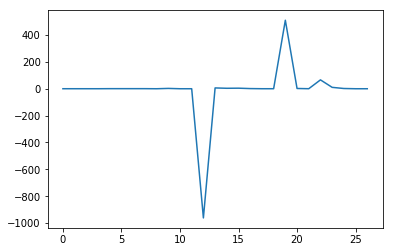

In [43]:
#Crear un vector rando (Unicamente para elegír una imagen al azar)
ind = np.random.permutation(X_train.shape[0])
plt.plot(X_train[ind[0],:]);
print(X_train[ind[0]])

In [44]:
'''from sklearn.decomposition import FastICA, PCA
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)'''

'from sklearn.decomposition import FastICA, PCA\npca = PCA(n_components=26)\nX_train = pca.fit_transform(X_train)\nX_test = pca.fit_transform(X_test)'

In [45]:
print (np.shape(X_train))
print (np.shape(X_test))

(208, 27)
(52, 27)


In [46]:
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

#Obtener las dimensiones de entrada de la red
input_dim = X_train.shape[1]

#Normalizar los datos de entrada.
scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.fit_transform(X_test)
DatosN=scaler.fit_transform(Datos)

#Convertir las etiquetas a un arreglo de 10 salidas
y_trainOHE = np_utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

print(y_trainOHE[ind[0],:])

[1. 0.]


[ 0.71729147  2.52786769 -0.90625454 -1.37451665  2.41337633  2.41337633
  2.41337633  2.41337633 -1.85818878 -0.26441669  1.78568357  0.5466531
  1.58879891 -0.13052114  0.66384297 -1.26594173  1.93850058  1.95093522
  1.90227797  1.17863017  1.17863016  2.80062628  1.95093524  1.65793588
  1.3788322   0.          0.2922723 ]


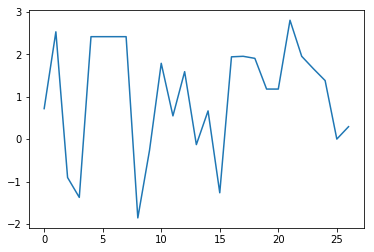

In [47]:
plt.plot(X_trainN[ind[0],:]);
print(X_trainN[ind[0]])

In [48]:
print (input_dim)
print (nb_classes)
reg=0.4
epo=1000

27
2


In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

# Diseñar la arquitectura del MLP
model = Sequential()
model.add(Dense(13, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dropout(reg))
model.add(Dense(6))
model.add(Activation('tanh'))
model.add(Dropout(reg))
model.add(Dense(nb_classes, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 13)                364       
_________________________________________________________________
activation_17 (Activation)   (None, 13)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 84        
_________________________________________________________________
activation_18 (Activation)   (None, 6)                 0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                

In [50]:
# Diseñar la arquitectura del MLP
model2 = Sequential()
model2.add(Dense(8, input_dim=input_dim))
model2.add(Activation('tanh'))
model2.add(Dropout(reg))
model2.add(Dense(4))
model2.add(Activation('tanh'))
model2.add(Dropout(reg))
model2.add(Dense(nb_classes, activation='softmax'))
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 224       
_________________________________________________________________
activation_19 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 36        
_________________________________________________________________
activation_20 (Activation)   (None, 4)                 0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 2)               

In [51]:
model3 = Sequential()
model3.add(Dense(16, input_dim=input_dim))
model3.add(Activation('tanh'))
model3.add(Dropout(reg))
model3.add(Dense(8))
model3.add(Activation('tanh'))
model3.add(Dropout(reg))
model3.add(Dense(4))
model3.add(Activation('tanh'))
model3.add(Dropout(reg))
model3.add(Dense(nb_classes, activation='softmax'))
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                448       
_________________________________________________________________
activation_21 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_22 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 4)               

In [52]:
model4 = Sequential()
model4.add(Dense(8, input_dim=input_dim))
model4.add(Activation('tanh'))
model4.add(Dropout(reg))
model4.add(Dense(nb_classes, activation='softmax'))
model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 8)                 224       
_________________________________________________________________
activation_24 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 18        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Definir la función de pérdida
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [0]:
model.load_weights("drive/My Drive/Xmodel.h5")
model2.load_weights("drive/My Drive/Xmodel2.h5")
model3.load_weights("drive/My Drive/Xmodel3.h5")
model4.load_weights("drive/My Drive/Xmodel4.h5")

In [55]:
preds = model.predict_classes(X_testN, verbose=0)
oAccuracy = np.mean(preds == (y_test))
print('Precision = ', oAccuracy*100, '%')

preds2 = model2.predict_classes(X_testN, verbose=0)
oAccuracy2 = np.mean(preds2 == (y_test))
print('Precision = ', oAccuracy2*100, '%')  

preds3 = model3.predict_classes(X_testN, verbose=0)
oAccuracy3 = np.mean(preds3 == (y_test))
print('Precision = ', oAccuracy3*100, '%')

preds4 = model4.predict_classes(X_testN, verbose=0)
oAccuracy4 = np.mean(preds4 == (y_test))
print('Precision = ', oAccuracy4*100, '%')

Precision =  75.38461538461539 %
Precision =  77.3076923076923 %
Precision =  79.23076923076923 %
Precision =  75.38461538461539 %


In [56]:
'''#Parametros propios de la perdida
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])'''

"#Parametros propios de la perdida\nfrom keras import optimizers\n\nsgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)\nmodel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])\nmodel2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])\nmodel3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])"

In [0]:
pre1=[]
pre2=[]
pre3=[]
pre4=[]

In [58]:
bat=260
epo=5000
for i in range(1):
  
  del model
  del model2
  del model3
  del model4
  
  model = Sequential()
  model.add(Dense(13, input_dim=input_dim))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(6))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(nb_classes, activation='softmax'))
  
  model2 = Sequential()
  model2.add(Dense(8, input_dim=input_dim))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(4))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(nb_classes, activation='softmax'))
  
  model3 = Sequential()
  model3.add(Dense(16, input_dim=input_dim))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(8))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(4))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(nb_classes, activation='softmax'))

  model4 = Sequential()
  model4.add(Dense(8, input_dim=input_dim))
  model4.add(Activation('tanh'))
  model4.add(Dropout(reg))
  model4.add(Dense(nb_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  
  #print("Entrenando modelo 1...")
  history1x=model.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  #print("Entrenando modelo 2...")
  history2x=model2.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  #print("Entrenando modelo 3...")
  history3x=model3.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  #print("Entrenando modelo 4...")
  history4x=model4.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  
  #clear_output(wait=True)
  
  preds = model.predict_classes(X_testN, verbose=0)
  Accuracy = np.mean(preds == y_test)
  pre1.append(Accuracy)  
  print('Precision = ', Accuracy*100, '%')
    
  preds2 = model2.predict_classes(X_testN, verbose=0)
  Accuracy2 = np.mean(preds2 == y_test)
  pre2.append(Accuracy2)
  print('Precision = ', Accuracy2*100, '%')  
  
  preds3 = model3.predict_classes(X_testN, verbose=0)
  Accuracy3 = np.mean(preds3 == y_test)
  pre3.append(Accuracy3)
  print('Precision = ', Accuracy3*100, '%')
  
  preds4 = model4.predict_classes(X_testN, verbose=0)
  Accuracy4 = np.mean(preds4 == y_test)
  pre4.append(Accuracy4)
  print('Precision = ', Accuracy4*100, '%')
  
  if Accuracy>oAccuracy:
    model.save_weights("drive/My Drive/Xmodel.h5")
    oAccuracy=Accuracy
    history1=history1x
    
  if Accuracy2>oAccuracy2:
    model2.save_weights("drive/My Drive/Xmodel2.h5")
    oAccuracy2=Accuracy2
    history2=history2x
    
  if Accuracy3>oAccuracy3:
    model3.save_weights("drive/My Drive/Xmodel3.h5")
    oAccuracy3=Accuracy3
    history3=history3x
    
  if Accuracy4>oAccuracy4:
    model4.save_weights("drive/My Drive/Xmodel4.h5")
    oAccuracy4=Accuracy4
    history4=history4x
  if i==0:
    history1=history1x
    history2=history2x
    history3=history3x
    history4=history4x
    
  

Precision =  48.07692307692308 %
Precision =  51.92307692307693 %
Precision =  51.92307692307693 %
Precision =  53.84615384615385 %


In [59]:
print('Precision = ', oAccuracy*100, '%')
print('Precision = ', oAccuracy2*100, '%')
print('Precision = ', oAccuracy3*100, '%')
print('Precision = ', oAccuracy4*100, '%')

Precision =  75.38461538461539 %
Precision =  77.3076923076923 %
Precision =  79.23076923076923 %
Precision =  75.38461538461539 %


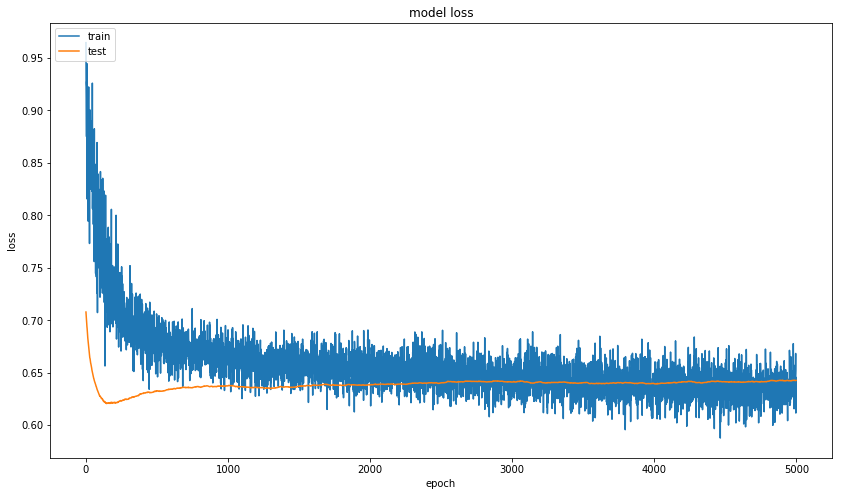

In [60]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

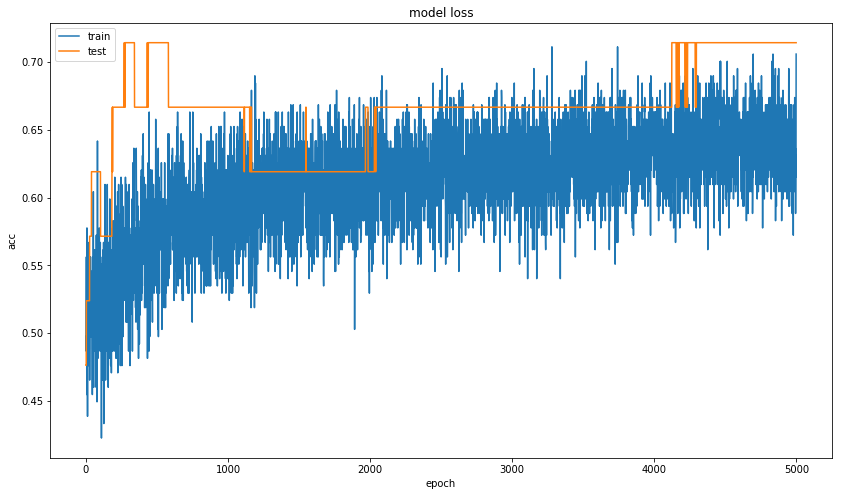

In [61]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model loss')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

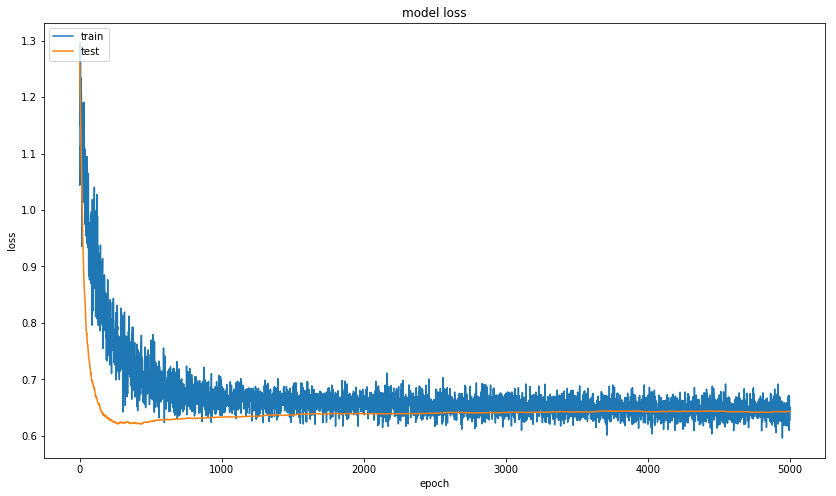

In [62]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

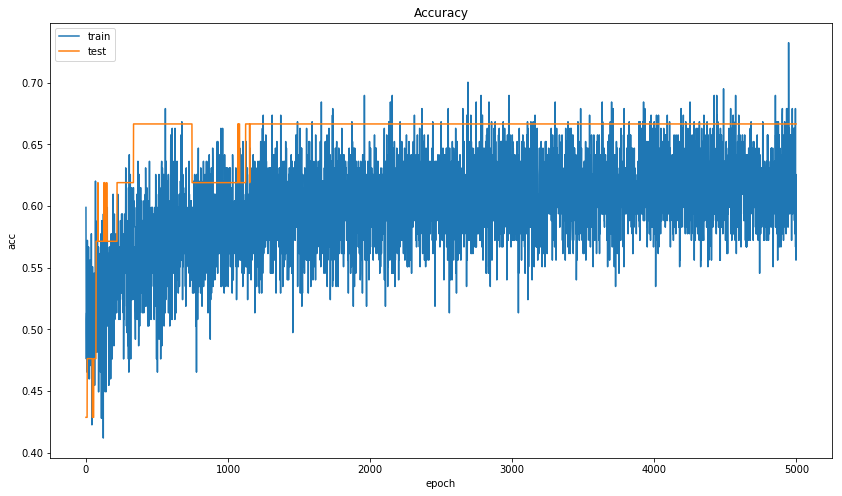

In [63]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

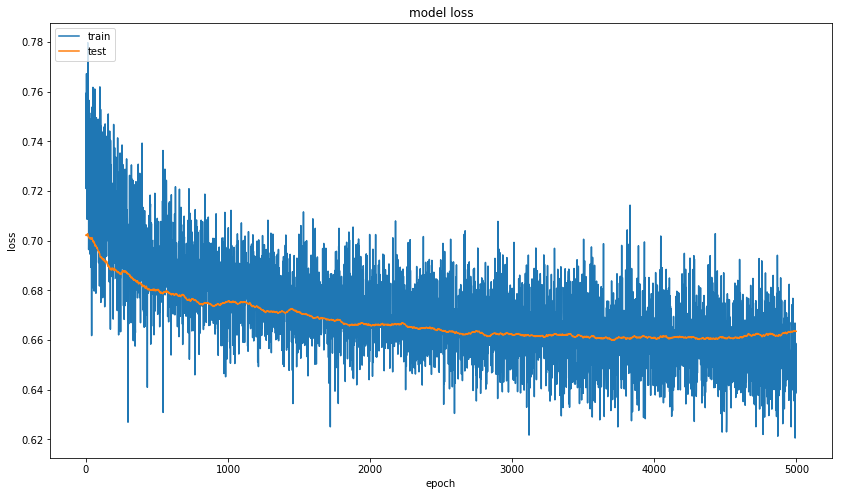

In [64]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

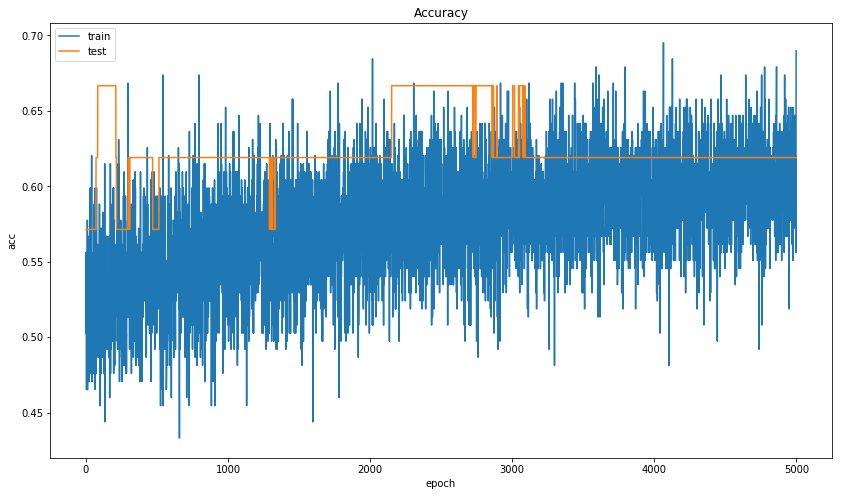

In [65]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

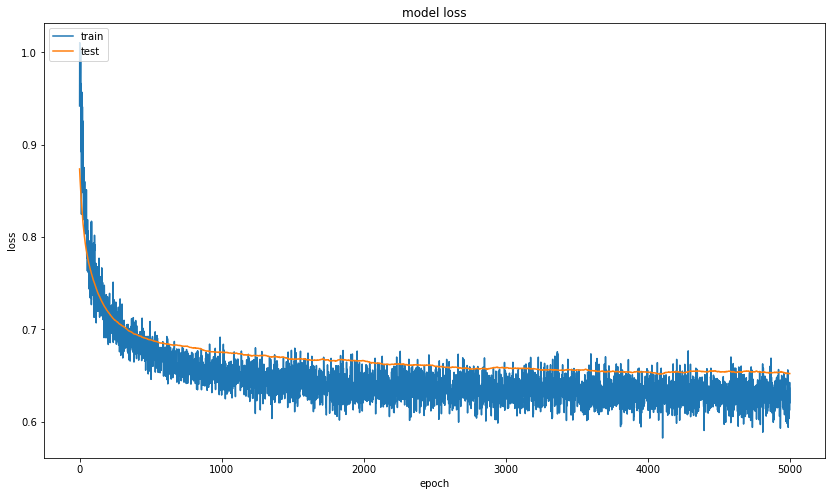

In [66]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
print (np.max(pre1))
print (np.max(pre2))
print (np.max(pre3))
print (np.max(pre4))

0.4807692307692308
0.5192307692307693
0.5192307692307693
0.5384615384615384


### Restricted Boltzman Machine

In [68]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=20, batch_size=5, learning_rate=0.1, n_iter=1000, random_state=None, verbose=0)
rbm.fit(X_train[y_train==0]);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
print (np.shape(W))

(20, 27)


In [0]:
def free_energy(v,c,b,W):
    return - v.dot(c)- np.logaddexp(0, v.dot(W.T) + b).sum() 

def plot_free_energy(X_domain, c,b,W):
    #Calcula la energia libre para todos los posibles valores de entrada
    energies = np.r_[[free_energy(i,c,b,W) for i in X_domain]]    
    return energies

In [0]:
EnerSenal=plot_free_energy(X_train[y_train==0], c,b,W)
EnerRuido=plot_free_energy(X_train[y_train==1], c,b,W)

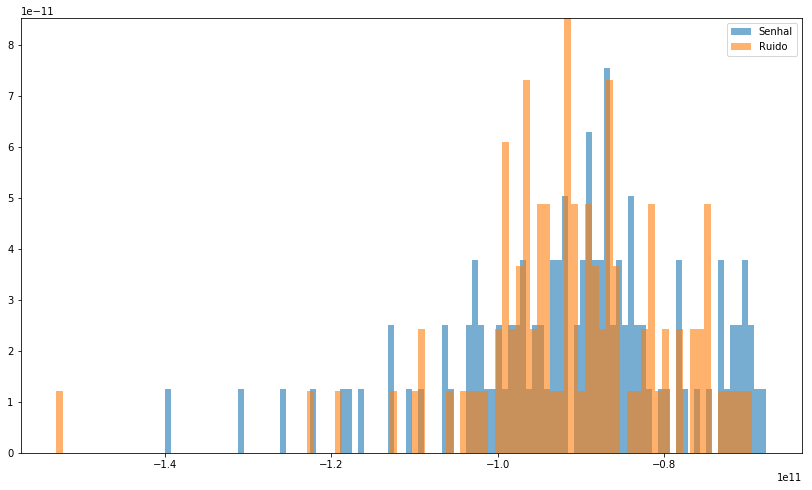

In [71]:
plt.figure(figsize=(14,8))
plt.hist(EnerSenal, bins=100, label='Senhal', alpha=0.6, density=True);
plt.hist(EnerRuido, bins=100, label='Ruido', alpha=0.6, density=True);
plt.legend()